# Project 1: Test a Perceptual Phenomenon
### Preamble and experimental design

http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/

In this variation of the Stroop Task, we want to know if an incongruency between the printed ink color of a word and its text content will increase the time needed to name the ink color. The independent variable is the congruent or incongruent condition of the words; that is, whether or not the printed color of the word matches its text. The dependent variable is the time it takes to name the ink colors. The question to answer is: does the incongruent condition affect the time needed to name the ink color?

The setup of the experiment provides us with dependent, paired samples; one for each condition. As such, a standard Student's t-test for the comparison of dependent samples should be sufficient to determine the condition's effect. We assume that the data is normally distributed, and that the observations are independent of one another (despite being paired).

Our hypotheses and experimental setup is as follows, where $ \mu_c $ is the mean congruent time for naming, and $ \mu_i $ the mean incongruent time. The null hypothesis is that mean congruent time is equal to the mean incogruent time; the alternative hypothesis is that they are not equal. We select an alpha-level of 0.05, which for a two-tailed test with 24 samples gives us a t-critical value of plus/minus 2.064.

$ H_0: \mu_c=\mu_i $

$ H_A: \mu_c \ne \mu_i $

$ \alpha=0.05, n=24 $

$ t_{critical} = \pm2.064 $

### Initial setup and exploration
First, we import the pandas library and load the sample data. We take a look at the data to make sure it imported correctly, then use a pandas built-in function to generate some descriptive statistics. We see that there appears to be a significant difference between the mean naming time for the congruent and incongruent conditions. While the center of the data sets are different, their standard deviation and interquartile ranges are comparable. This implies that the data has undergone a distinct and identifiable change, shifting the center while not affecting variability.

In [2]:
import pandas as pd

# https://chrisalbon.com/python/pandas_dataframe_importing_csv.html
stroop_data = pd.read_csv('stroopdata.csv')
stroop_data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [3]:
# http://bconnelly.net/2013/10/summarizing-data-in-python-with-pandas/
# https://chrisalbon.com/python/pandas_dataframe_descriptive_stats.html
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### Data visualization
Visualization will provide greater insight into the descriptive statistics. We make use of the graphics functions bulit into pandas and integrated into the jupyter notebook. We can generate histograms of the datasets showing the fequency distributions for the naming times. We look at the histograms both side by side, and laid on top of one another. This provides us a sense of the shape of the data and their intersection, respectively. The jupyter notebook provides widgets for interacting with the data; here, we use a slider to control the bin size. Some fiddling suggests that a bin size of 16 is most illustrative. We see that both the congruent and incogruent data are normally distributed, with a slight right skew. Both data sets are packed tightly arond the mean, with some outliers to the right increasing the skew.

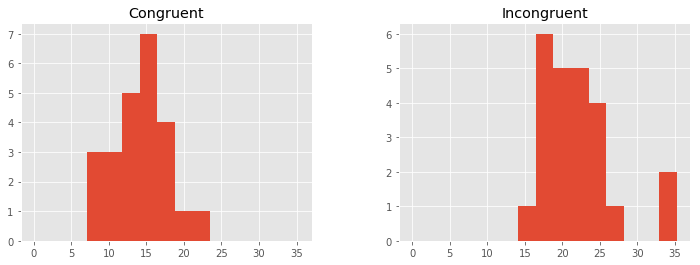

In [4]:
# http://stackoverflow.com/questions/10511024/in-ipython-notebook-pandas-is-not-displying-the-graph-i-try-to-plot
%matplotlib inline

# https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/
# http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#interactive
from ipywidgets import interact

# http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-hist
import matplotlib
matplotlib.style.use('ggplot')

# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html
# http://stackoverflow.com/questions/28654003/how-to-plot-histograms-from-dataframes-in-pandas
# http://stackoverflow.com/questions/12125880/changing-default-x-range-in-histogram-matplotlib
# http://stackoverflow.com/questions/24571005/return-max-value-from-panda-dataframe-as-a-whole-not-based-on-column-or-rows
def side_by_side(bin_size):
    stroop_data.hist(bins=bin_size, layout=(1,2), figsize=(12,4), range=(0, stroop_data.values.max()))

interact(side_by_side, bin_size=(1,len(stroop_data),1))

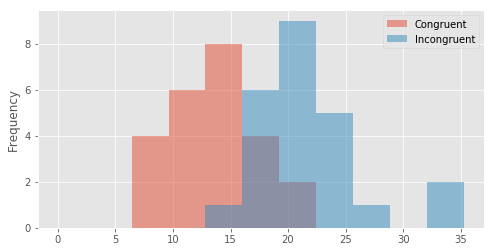

In [5]:
# http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-hist

def overlay(bin_size):
    stroop_data.plot.hist(bins=bin_size, alpha=0.5, figsize=(8,4), range=(0, stroop_data.values.max()))

interact(overlay, bin_size=(1,len(stroop_data),1))

### Hypothesis testing and conclusion

We perform the Student's t-test for the comparison of dependent samples. The scipy.stats library has a built-in function for this. From the initial setup, we recall the t-critical value for our experiment is plus/minus 2.064. The test returns a t-statistic of -8, far beyond the critical value. Accordingly, the test provides a probablity of observing such a value due to chance at less than 1 in 10 million.

We perform the t-test manually, just to be sure the function is behaving as expected. This also sets us up with the data necessary to generate a confidence interval.

Conclusion: there is sufficient evidence to reject the null hypothesis. It appears that incongruence between printed ink color and text context content affects naming the ink color. We are 95% confident that the incogruent naming time is between approximately 6 and 10 seconds slower than the congruent naming time. This lines up with our naive expectations; it seems logical that incogruence would cause cognitive interference, and slow down the naming process.

In [6]:
# http://stackoverflow.com/questions/13404468/t-test-in-pandas-python
# http://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy
# https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.ttest_rel.html
from scipy import stats

stats.ttest_rel(stroop_data['Congruent'], stroop_data['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [8]:
# Double-check

summary_data = pd.DataFrame()
summary_data['dlt'] = stroop_data.apply( lambda x: x.Congruent - x.Incongruent, axis=1 )
summary_data['diff_dev'] = summary_data['dlt'].apply( lambda x: (x - summary_data['dlt'].mean())**2 )
print summary_data

mean_diff = stroop_data['Congruent'].mean() - stroop_data['Incongruent'].mean()
print "DF mean equals point estimate: ", round(summary_data['dlt'].mean(), 7) == round(mean_diff, 7)

calc_std = (summary_data.diff_dev.sum() / (len(summary_data) - 1) ) ** 0.5
print "DF diff std equals calculated std: ", summary_data['dlt'].std() == calc_std

t = summary_data['dlt'].mean() / (summary_data['dlt'].std()  / len(summary_data) ** 0.5 )
print "t-statistic: ", t

       dlt    diff_dev
0   -7.199    0.586437
1   -1.950   36.177719
2  -11.650   13.580760
3   -7.057    0.824086
4   -8.134    0.028631
5   -8.640    0.455906
6   -9.880    3.668023
7   -8.407    0.195548
8  -11.361   11.534231
9  -11.802   14.724168
10  -2.196   33.278957
11  -3.346   21.333236
12  -2.437   30.556481
13  -3.401   20.828194
14 -17.055   82.631888
15 -10.028    4.256829
16  -6.644    1.744491
17  -9.790    3.331385
18  -6.081    3.548671
19 -21.919  194.719930
20 -10.950    8.911469
21  -3.727   17.958878
22  -2.348   31.548349
23  -5.153    7.906172
DF mean equals point estimate:  True
DF diff std equals calculated std:  True
t-statistic:  -8.02070694411


In [9]:
ci = 2.064 * (calc_std / len(summary_data)**0.5 )
print "confidence interval: (", mean_diff - ci, ",", mean_diff + ci, ")"

confidence interval: ( -10.0144027688 , -5.91518056448 )


### Concluding remarks

The experiemnt confirmed our expectations: incongruency between a printed word's ink color and text content impeded naming the ink color. The Stroop effect is a demonstration of cognitive interference, which can take many forms. Research shows that, despite the claims of "multitaskers", the human mind can only focus on one subject at a time. Conflicting stimuli, as in the case of the Stroop task, can affect the speed and accuracy of memory and recall. A practical examination of this phenomena would be to see the speed with which students complete assignments in the presence of distractions like music or televeision. Another experiment with more serious consequences would be to study reaction time for distracted drivers.